# 1.	Problem Statement
```
   Predict July payment status
   Do customers pay the payment on time or defaulted?
```

# 2. Data Import

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import  pyplot as plt
data = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/data for participants.csv")

```
Credit_Limit:      "200"-"40000"
Sex:               “1” = Male, “2” = Female, other values = unknown
Education:             “1” = Master's degree & Doctoral Degree, “2” =Bachelor’s Degree, “3” =High School’s Degree, “4” 
                        =Others, other value = unknown
Marital_Status:         “1” = Married, “2” = Single, “3” = Others, other value  = unknown)
Age:                    "14"-"100"
Jan_Repay_Status~ Jul_Repay_Status:    “-n” = paid on time properly, “n” = payment delayed for n month already

Previous_Payment_Prior_Jan 
 ~ Previous_Payment_Prior_Jun:         "-50000"-"50000"

Jan_Statement ~ Jun_Statement:          "-50000"-"50000"
July_Payment_Status:                    “0” = Paid on time, “1” = Defaulted on July Statement Balance
``` 

In [141]:
data

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,3.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30597,1700.0,2.0,2.0,1.0,29.0,0.0,80.0,1598.0,0.0,80.0,...,0.0,56.0,1598.0,0.0,52.0,1556.0,0.0,80.0,1509.0,0.0
30598,4700.0,1.0,1.0,2.0,33.0,2.0,80.0,2082.0,0.0,80.0,...,0.0,100.0,2194.0,0.0,100.0,2258.0,0.0,100.0,2321.0,1.0
30599,6000.0,2.0,1.0,2.0,53.0,0.0,191.0,5418.0,0.0,198.0,...,0.0,165.0,5740.0,0.0,201.0,5842.0,0.0,140.0,5994.0,1.0
30600,14500.0,2.0,3.0,2.0,46.0,-2.0,28.0,0.0,-2.0,0.0,...,-2.0,61.0,0.0,-2.0,0.0,61.0,-2.0,0.0,0.0,0.0


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30602 entries, 0 to 30601
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Credit_Limit                30602 non-null  float64
 1   Sex                         30601 non-null  float64
 2   Education                   30599 non-null  float64
 3   Marital_Status              30598 non-null  float64
 4   Age                         30595 non-null  float64
 5   Jan_Repay_Status            30597 non-null  float64
 6   Previous_Payment_Prior_Jan  30599 non-null  float64
 7   Jan_Statement               30595 non-null  float64
 8   Feb_Repay_Status            30600 non-null  float64
 9   Previous_Payment_Prior_Feb  30597 non-null  float64
 10  Feb_Statement               30595 non-null  float64
 11  Mar_Repay_Status            30599 non-null  float64
 12  Previous_Payment_Prior_Mar  30600 non-null  float64
 13  Mar_Statement               305

In [143]:
# missing value：except for Credit_Limit

In [144]:
data.shape

(30602, 24)

In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit_Limit,30602.0,6672.102712,5165.664158,200.0,2100.0,5600.0,9500.00,40100.0
Sex,30601.0,1.600667,0.510355,0.0,1.0,2.0,2.00,8.0
Education,30599.0,1.872349,0.816311,0.0,1.0,2.0,2.00,6.0
Marital_Status,30598.0,1.560625,0.533208,0.0,1.0,2.0,2.00,4.0
Age,30595.0,35.835921,10.142700,14.0,28.0,34.0,42.00,102.0
Jan_Repay_Status,30597.0,0.069615,1.396863,-2.0,-1.0,0.0,0.00,12.0
Previous_Payment_Prior_Jan,30599.0,243.085297,697.377685,0.0,40.0,87.0,205.00,34942.0
Jan_Statement,30595.0,2058.031084,2936.812290,-6623.0,147.0,914.0,2712.00,38580.0
Feb_Repay_Status,30600.0,-0.043595,1.466934,-2.0,-1.0,0.0,0.00,12.0
Previous_Payment_Prior_Feb,30597.0,252.887473,941.932594,0.0,36.0,82.0,200.00,67370.0


# 3. Data Cleaning

###  3.1 Remove duplicate values

In [146]:
data.drop_duplicates(keep="first",inplace=True)

In [147]:
data.index = range(data.shape[0])  # organize 
data

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,3.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30580,1700.0,2.0,2.0,1.0,29.0,0.0,80.0,1598.0,0.0,80.0,...,0.0,56.0,1598.0,0.0,52.0,1556.0,0.0,80.0,1509.0,0.0
30581,4700.0,1.0,1.0,2.0,33.0,2.0,80.0,2082.0,0.0,80.0,...,0.0,100.0,2194.0,0.0,100.0,2258.0,0.0,100.0,2321.0,1.0
30582,6000.0,2.0,1.0,2.0,53.0,0.0,191.0,5418.0,0.0,198.0,...,0.0,165.0,5740.0,0.0,201.0,5842.0,0.0,140.0,5994.0,1.0
30583,14500.0,2.0,3.0,2.0,46.0,-2.0,28.0,0.0,-2.0,0.0,...,-2.0,61.0,0.0,-2.0,0.0,61.0,-2.0,0.0,0.0,0.0


### 3.2 Missing Values

In [148]:
data.isnull().sum()
# data.isnull().sum()/data.shape[0]

Credit_Limit                  0
Sex                           1
Education                     3
Marital_Status                4
Age                           7
Jan_Repay_Status              5
Previous_Payment_Prior_Jan    3
Jan_Statement                 7
Feb_Repay_Status              2
Previous_Payment_Prior_Feb    5
Feb_Statement                 7
Mar_Repay_Status              3
Previous_Payment_Prior_Mar    2
Mar_Statement                 4
Apr_Repay_Status              4
Previous_Payment_Prior_Apr    3
Apr_Statement                 3
May_Repay_Status              1
Previous_Payment_Prior_May    4
May_Statement                 3
Jun_Repay_Status              2
Previous_Payment_Prior_Jun    2
Jun_Statement                 5
July_Payment_Status           1
dtype: int64

#### 3.2.1 Jan to Jun Repay Staus, Previous Payment Prior Jan to Jun, and Jan to Jun Statement Missing Values
        Using mean to fill NaN

In [149]:
# numbers use mean to fill NaN
Missing_values =["Jan_Repay_Status","Feb_Repay_Status","Mar_Repay_Status","Apr_Repay_Status","May_Repay_Status","Jun_Repay_Status",
                "Previous_Payment_Prior_Jan","Previous_Payment_Prior_Feb","Previous_Payment_Prior_Mar","Previous_Payment_Prior_Apr","Previous_Payment_Prior_May","Previous_Payment_Prior_Jun",
                "Jan_Statement","Feb_Statement","Mar_Statement","Apr_Statement","May_Statement","Jun_Statement"]
for i in Missing_values:
    data[i].fillna(int(data[i].mean()), inplace=True)

#### 3.2.2 Sex Missing Values
    Using mode to fill NaN
    Sex: “1” = Male, “2” = Female, other values = unknown. 
    Keep “1” male and “2” female.

In [150]:
data["Sex"].value_counts()

2.0    18298
1.0    12103
0.0      113
3.0       46
4.0       14
5.0        3
7.0        3
6.0        3
8.0        1
Name: Sex, dtype: int64

In [151]:
data["Sex"].mode()

0    2.0
dtype: float64

In [152]:
data["Sex"]=data["Sex"].replace([0,3,4,5,6,7,8],2)
data["Sex"].fillna(int(data["Sex"].mode()), inplace=True) #1 missing

In [153]:
data["Sex"].value_counts()

2.0    18482
1.0    12103
Name: Sex, dtype: int64

#### 3.2.3 Education Missing Value
    Using mode to fill NaN
    Education:“1” = Master's degree & Doctoral Degree, “2” =Bachelor’s Degree, “3” =High School’s Degree, “4”

In [154]:
data["Education"].value_counts()

2.0    14154
1.0    10704
3.0     5059
5.0      369
4.0      231
6.0       51
0.0       14
Name: Education, dtype: int64

In [155]:
data["Education"].mode()

0    2.0
dtype: float64

In [156]:
data["Education"]=data["Education"].replace([0,5,6],2)
data["Education"].fillna(int(data["Education"].mode()), inplace=True) #3 missing
data["Education"].value_counts()

2.0    14591
1.0    10704
3.0     5059
4.0      231
Name: Education, dtype: int64

#### 3.2.4 Marital Status Missing Value
    Marital_Status: “1” = Married, “2” = Single, “3” = Others, other value  = unknown)
    Using mode to fill NaN
    Keep "1" & "2"

In [157]:
data["Marital_Status"].value_counts()

2.0    16169
1.0    13847
3.0      503
0.0       54
4.0        8
Name: Marital_Status, dtype: int64

In [158]:
data["Marital_Status"].mode()

0    2.0
dtype: float64

In [159]:
data["Marital_Status"]=data["Marital_Status"].replace([0,3,4],2)
data["Marital_Status"].fillna(int(data["Marital_Status"].mode()), inplace=True) #4 missing
data["Marital_Status"].value_counts()

2.0    16738
1.0    13847
Name: Marital_Status, dtype: int64

#### 3.2.5 Age Missing Values
    Using mode to fill NaN
    Age:"14"-"100"
    Keep the range of 14 - 100 years old

In [160]:
data["Age"].value_counts()

29.0     1406
27.0     1403
28.0     1393
31.0     1373
30.0     1360
         ... 
89.0        3
100.0       2
102.0       2
101.0       1
14.0        1
Name: Age, Length: 88, dtype: int64

In [161]:
data[data["Age"]>100]

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
476,9500.0,1.0,2.0,2.0,102.0,3.0,2423.0,3074.0,6.0,2037.0,...,2.0,1131.0,3267.0,5.0,2705.0,8335.0,7.0,3998.0,7278.0,1.0
5740,2100.0,2.0,4.0,2.0,101.0,8.0,410.0,1832.0,6.0,1869.0,...,3.0,1010.0,1921.0,9.0,928.0,2017.0,0.0,522.0,1197.0,0.0
12201,600.0,1.0,4.0,1.0,102.0,7.0,56.0,81.0,10.0,28.0,...,5.0,148.0,342.0,5.0,56.0,147.0,7.0,202.0,457.0,1.0


In [162]:
data[data["Age"]<14]

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status


In [163]:
data["Age"].mode()

0    29.0
dtype: float64

In [164]:
data["Age"]=data["Age"].replace([101,102],29)  # replace by nearest age in the range
data["Age"].fillna(int(data["Age"].mode()), inplace=True)  # 7 missing 
data["Age"].unique()

array([ 32.,  30.,  29.,  31.,  37.,  18.,  33.,  38.,  66.,  28.,  39.,
        35.,  23.,  49.,  26.,  57.,  41.,  52.,  60.,  47.,  24.,  40.,
        44.,  36.,  48.,  43.,  72.,  34.,  27.,  67.,  25.,  42.,  51.,
        58.,  56.,  21.,  64.,  22.,  20.,  45.,  70.,  55.,  50.,  54.,
        53.,  46.,  19.,  59.,  98.,  96.,  63.,  80.,  68.,  84.,  62.,
        88.,  65.,  95.,  17.,  61.,  97.,  83.,  90.,  85.,  74.,  73.,
        87.,  81.,  69.,  93.,  15.,  77.,  91.,  94.,  76.,  71.,  82.,
        75.,  78.,  89.,  16.,  79.,  92., 100.,  99.,  14.])

In [165]:
data[data["Age"]>100]

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status


#### 3.2.6 July_Payment_Status Missing Values
    July_Payment_Status: “0” = Paid on time, “1” = Defaulted on July Statement Balance
    just 1 missing and delete it from the data

In [166]:
data["July_Payment_Status"].unique()

array([ 1.,  0.,  2., nan])

In [167]:
data["July_Payment_Status"].value_counts()

0.0    23701
1.0     6880
2.0        3
Name: July_Payment_Status, dtype: int64

In [168]:
data.dropna(axis=0,subset = ["July_Payment_Status"],inplace=True)
data[data["July_Payment_Status"]==2]

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
3356,1300.0,2.0,1.0,1.0,51.0,-1.0,58.0,97.0,9.0,134.0,...,12.0,379.0,440.0,1.0,72.0,1627.0,5.0,352.0,389.0,2.0
6446,8100.0,2.0,3.0,1.0,84.0,4.0,679.0,3131.0,10.0,214.0,...,3.0,210.0,113.0,8.0,64.0,117.0,3.0,1576.0,7240.0,2.0
26963,6600.0,2.0,4.0,1.0,70.0,0.0,3466.0,5299.0,7.0,322.0,...,12.0,983.0,1274.0,6.0,1459.0,2321.0,9.0,4828.0,5323.0,2.0


In [169]:
data.drop(index=data[data.July_Payment_Status==2].index, inplace=True)

In [170]:
data.isnull().sum()

Credit_Limit                  0
Sex                           0
Education                     0
Marital_Status                0
Age                           0
Jan_Repay_Status              0
Previous_Payment_Prior_Jan    0
Jan_Statement                 0
Feb_Repay_Status              0
Previous_Payment_Prior_Feb    0
Feb_Statement                 0
Mar_Repay_Status              0
Previous_Payment_Prior_Mar    0
Mar_Statement                 0
Apr_Repay_Status              0
Previous_Payment_Prior_Apr    0
Apr_Statement                 0
May_Repay_Status              0
Previous_Payment_Prior_May    0
May_Statement                 0
Jun_Repay_Status              0
Previous_Payment_Prior_Jun    0
Jun_Statement                 0
July_Payment_Status           0
dtype: int64

In [171]:
data

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,2.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30580,1700.0,2.0,2.0,1.0,29.0,0.0,80.0,1598.0,0.0,80.0,...,0.0,56.0,1598.0,0.0,52.0,1556.0,0.0,80.0,1509.0,0.0
30581,4700.0,1.0,1.0,2.0,33.0,2.0,80.0,2082.0,0.0,80.0,...,0.0,100.0,2194.0,0.0,100.0,2258.0,0.0,100.0,2321.0,1.0
30582,6000.0,2.0,1.0,2.0,53.0,0.0,191.0,5418.0,0.0,198.0,...,0.0,165.0,5740.0,0.0,201.0,5842.0,0.0,140.0,5994.0,1.0
30583,14500.0,2.0,3.0,2.0,46.0,-2.0,28.0,0.0,-2.0,0.0,...,-2.0,61.0,0.0,-2.0,0.0,61.0,-2.0,0.0,0.0,0.0


# 4. Filter unwanted outliers 
    Using IQR method to get the outliners and delete them

In [172]:
#data.describe().T

In [173]:
features = data.columns.to_list()
#features
type(features)
len(features)

24

Lower tail: Lt
Upper tail: Ut


<Figure size 432x288 with 0 Axes>

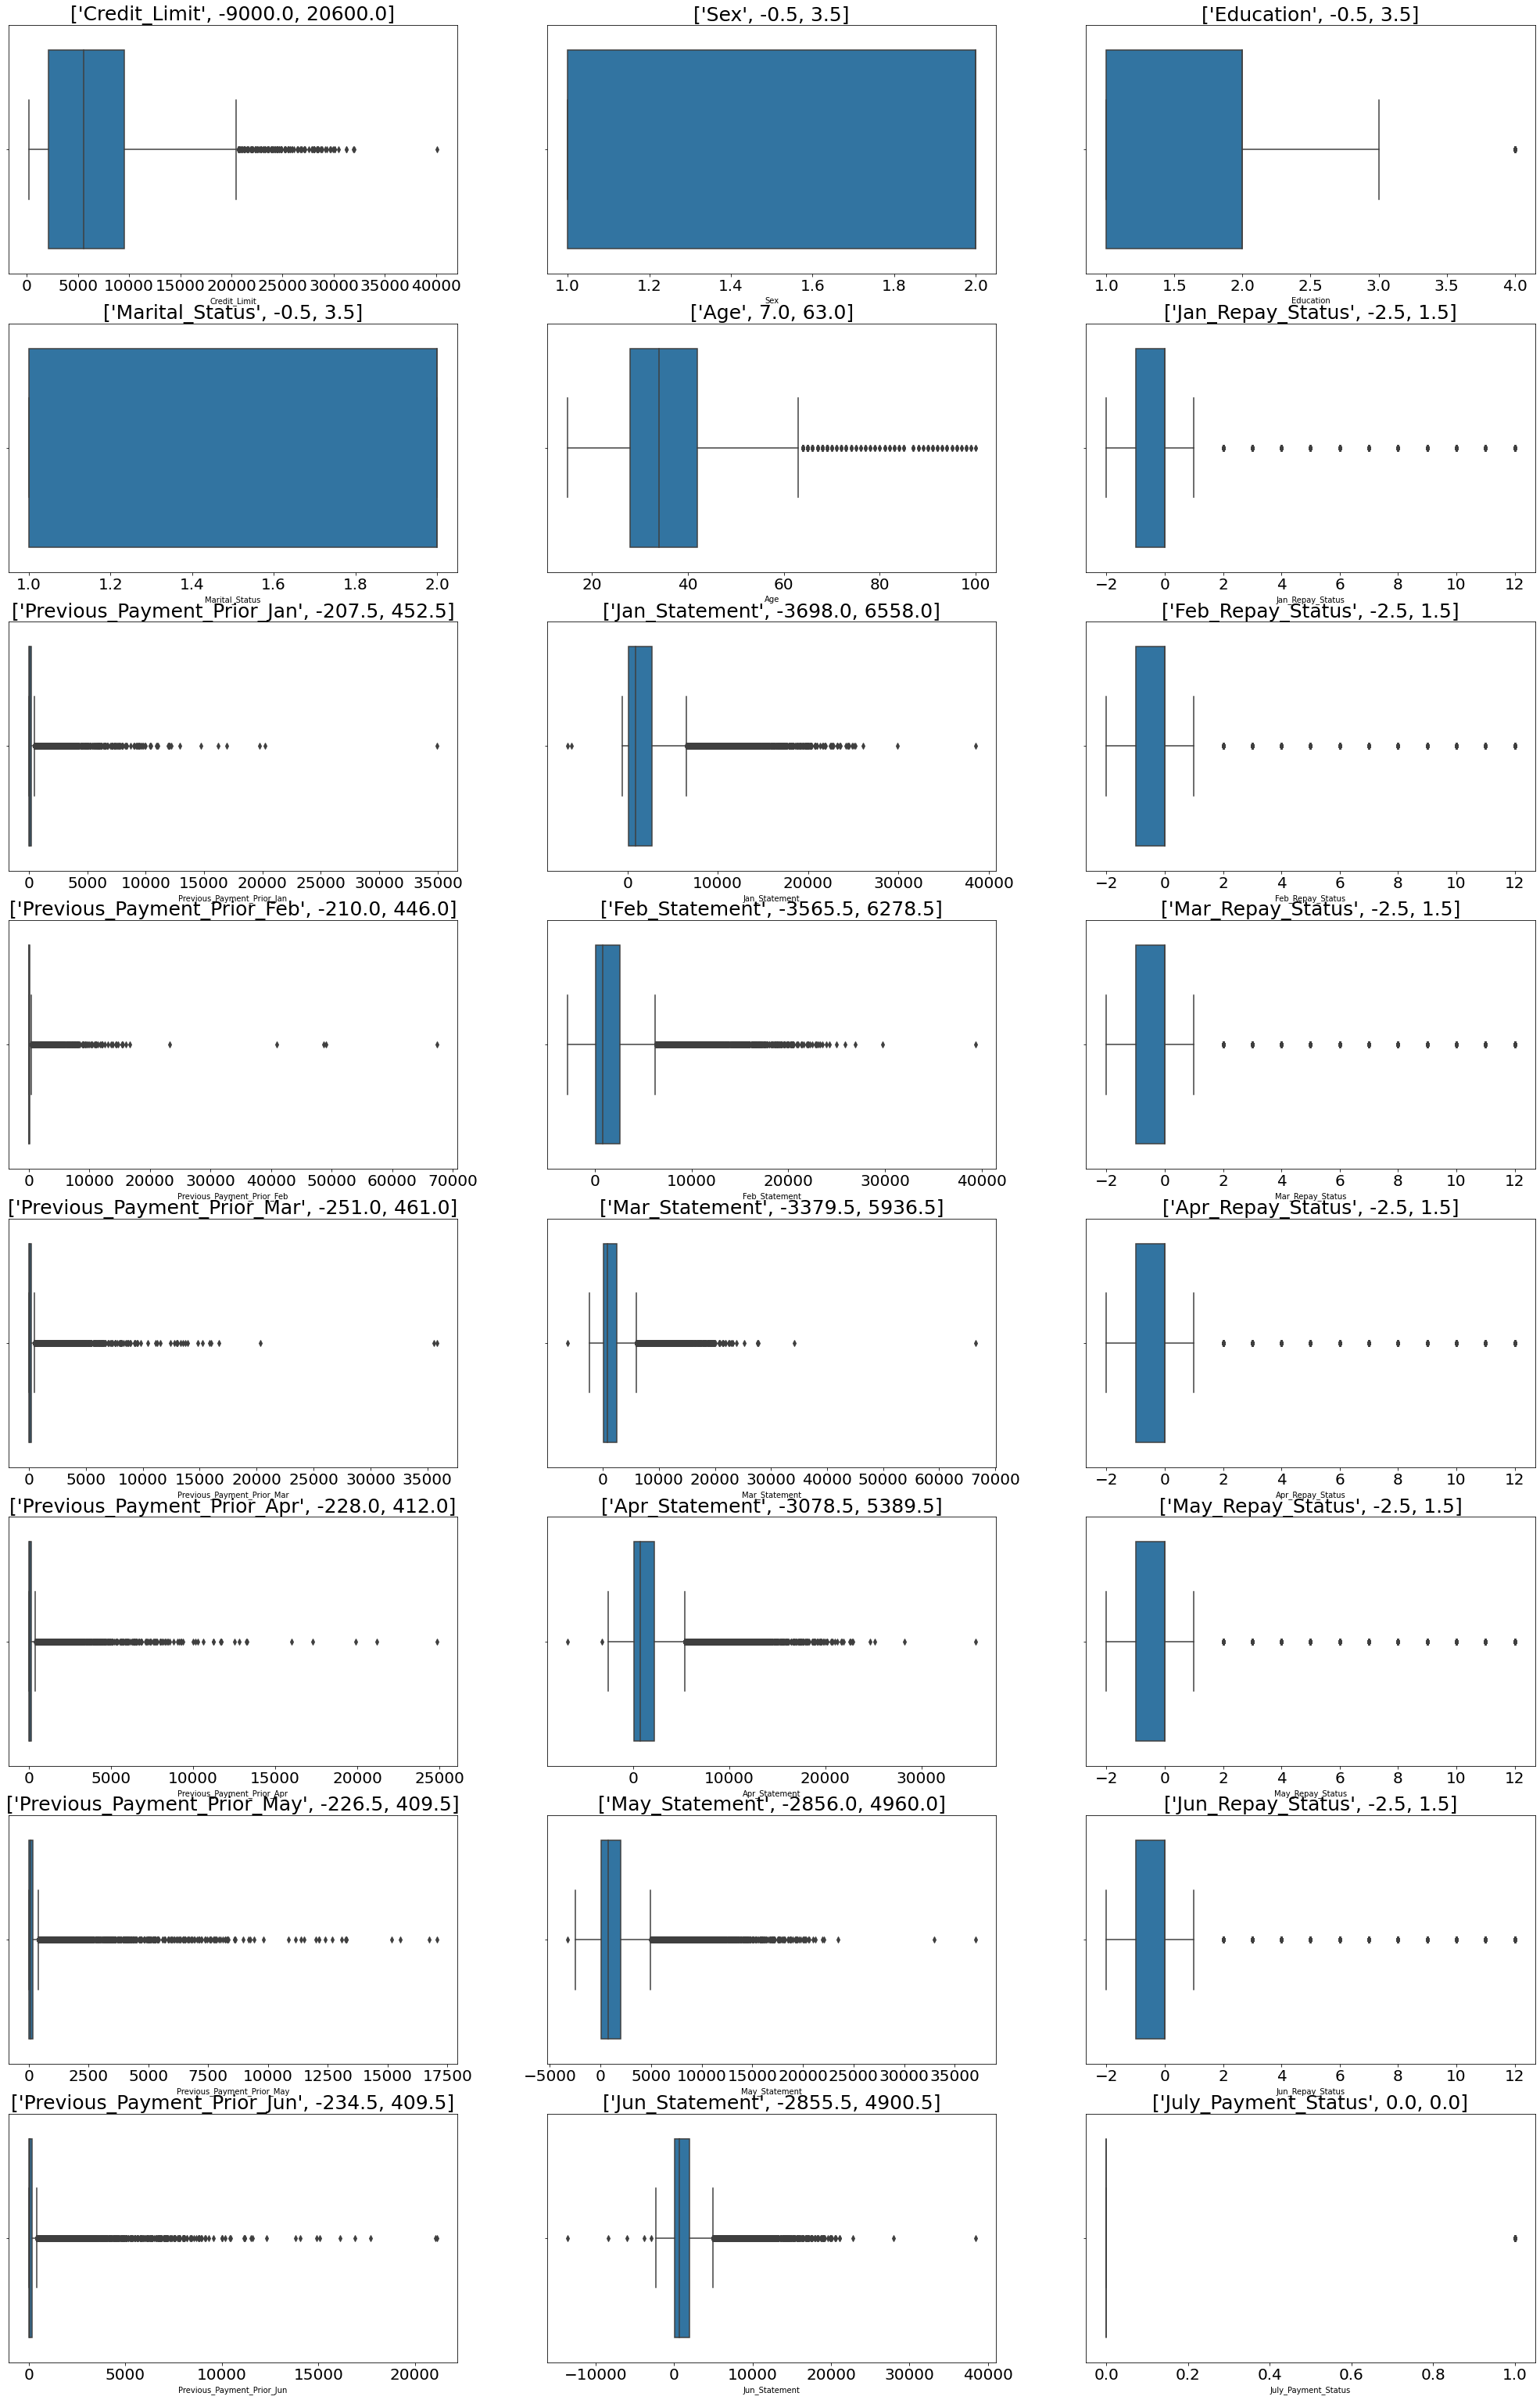

In [174]:
import warnings
warnings.filterwarnings('ignore')
print("Lower tail:","Lt")
print("Upper tail:","Ut")
i = 1
Ls=[]
plt.figure()
fig, ax = plt.subplots(8, 3,figsize=(35, 55))
for I in features:
    df=data[I]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    A=[I,Lower_tail,Upper_tail]
    Ls.append(A)
    plt.subplot(8, 3,i)
    sns.boxplot(df)
    plt.title(A,fontsize=25)
    plt.xticks(fontsize=20)
    i += 1
plt.show()

In [175]:
# import warnings
# warnings.filterwarnings('ignore')
# Ls=[]
# for I in features:
#     df=data[I]
#     q1 = df.quantile(0.25)
#     q3 = df.quantile(0.75)
#     iqr = q3-q1
#     Lower_tail = q1 - 1.5 * iqr
#     Upper_tail = q3 + 1.5 * iqr
#     A=[I,Lower_tail,Upper_tail]
#     Ls.append(A)
#     print(I,Lower_tail,Upper_tail)
#     plt.figure(figsize=(5, 2))
#     plt.title("Box Plot")
#     sns.boxplot(df)
#     plt.show()

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30581 entries, 0 to 30584
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Credit_Limit                30581 non-null  float64
 1   Sex                         30581 non-null  float64
 2   Education                   30581 non-null  float64
 3   Marital_Status              30581 non-null  float64
 4   Age                         30581 non-null  float64
 5   Jan_Repay_Status            30581 non-null  float64
 6   Previous_Payment_Prior_Jan  30581 non-null  float64
 7   Jan_Statement               30581 non-null  float64
 8   Feb_Repay_Status            30581 non-null  float64
 9   Previous_Payment_Prior_Feb  30581 non-null  float64
 10  Feb_Statement               30581 non-null  float64
 11  Mar_Repay_Status            30581 non-null  float64
 12  Previous_Payment_Prior_Mar  30581 non-null  float64
 13  Mar_Statement               305

In [177]:
Ls

[['Credit_Limit', -9000.0, 20600.0],
 ['Sex', -0.5, 3.5],
 ['Education', -0.5, 3.5],
 ['Marital_Status', -0.5, 3.5],
 ['Age', 7.0, 63.0],
 ['Jan_Repay_Status', -2.5, 1.5],
 ['Previous_Payment_Prior_Jan', -207.5, 452.5],
 ['Jan_Statement', -3698.0, 6558.0],
 ['Feb_Repay_Status', -2.5, 1.5],
 ['Previous_Payment_Prior_Feb', -210.0, 446.0],
 ['Feb_Statement', -3565.5, 6278.5],
 ['Mar_Repay_Status', -2.5, 1.5],
 ['Previous_Payment_Prior_Mar', -251.0, 461.0],
 ['Mar_Statement', -3379.5, 5936.5],
 ['Apr_Repay_Status', -2.5, 1.5],
 ['Previous_Payment_Prior_Apr', -228.0, 412.0],
 ['Apr_Statement', -3078.5, 5389.5],
 ['May_Repay_Status', -2.5, 1.5],
 ['Previous_Payment_Prior_May', -226.5, 409.5],
 ['May_Statement', -2856.0, 4960.0],
 ['Jun_Repay_Status', -2.5, 1.5],
 ['Previous_Payment_Prior_Jun', -234.5, 409.5],
 ['Jun_Statement', -2855.5, 4900.5],
 ['July_Payment_Status', 0.0, 0.0]]

In [178]:
Name=[]
lt= []
ut= []
for i in Ls:
    a=i[0]
    Name.append(a)
    b=i[1]
    lt.append(b)
    c=i[2]
    ut.append(c)
    data.drop(index=data.loc[(data[a] < b) & (data[a] < c)].index,inplace=True)

In [179]:
data.index = range(data.shape[0])  # organize row numbers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30570 entries, 0 to 30569
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Credit_Limit                30570 non-null  float64
 1   Sex                         30570 non-null  float64
 2   Education                   30570 non-null  float64
 3   Marital_Status              30570 non-null  float64
 4   Age                         30570 non-null  float64
 5   Jan_Repay_Status            30570 non-null  float64
 6   Previous_Payment_Prior_Jan  30570 non-null  float64
 7   Jan_Statement               30570 non-null  float64
 8   Feb_Repay_Status            30570 non-null  float64
 9   Previous_Payment_Prior_Feb  30570 non-null  float64
 10  Feb_Statement               30570 non-null  float64
 11  Mar_Repay_Status            30570 non-null  float64
 12  Previous_Payment_Prior_Mar  30570 non-null  float64
 13  Mar_Statement               305

In [180]:
#data
data.to_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/Cleaned data-Nancy(before sub-sample).csv")

# 5. Exploratory Data Analysis (EDA)

### 5.1 Does the data balance?

Jul defaulted numbers: 6878.0


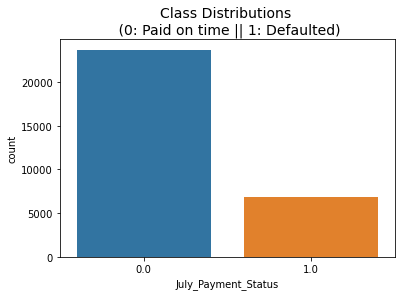

In [181]:
# imbalance 
# 30570 sample, 6878 defalted  
sns.countplot('July_Payment_Status', data=data)
plt.title('Class Distributions \n (0: Paid on time || 1: Defaulted)', fontsize=14)
print("Jul defaulted numbers:", data["July_Payment_Status"].sum())

In [182]:
print('July payment paid on time', round(data['July_Payment_Status'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('July payment defaulted', round(data['July_Payment_Status'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

July payment paid on time 77.5 % of the dataset
July payment defaulted 22.5 % of the dataset


### 5.2 Create a new sub-sample 
        concat the 6878 defaulted

#### 5.2.1 Splitting the Data (Original)

In [183]:
#Original data
X=data.drop("July_Payment_Status",axis=1)
y=data["July_Payment_Status"]

In [184]:
#from sklearn.model_selection import StratifiedKFold

In [185]:
#sss = StratifiedKFold(5, random_state=None, shuffle=False)

In [186]:
# for train_index, test_index in sss.split(X, y):
#     print("Train:", train_index, "Test:", test_index)
#     original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
#     original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [187]:
# # See if both the train and test label distribution are similarly distributed
# train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
# test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

In [188]:
# print('Label Distributions: \n')
# print(train_counts_label/ len(original_ytrain))
# print(test_counts_label/ len(original_ytest))

In [189]:
# # Turn into an array
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values

#### 5.2.2 Random Under-Sampling

In [190]:
# Shuffle the data before creating the subsamples
data2=data.copy()
ds= data2.sample(frac=1)
#ds

In [191]:
Jul_Defaulted= ds[ds["July_Payment_Status"]==1]
Jul_Paid= ds[ds["July_Payment_Status"]==0][:6878]

In [192]:
normal_distributed_data=pd.concat([Jul_Paid, Jul_Defaulted])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=30)
#len(new_data)   #13756

Distribution of the July_Payment_Status in the subsample dataset
0.0    0.5
1.0    0.5
Name: July_Payment_Status, dtype: float64


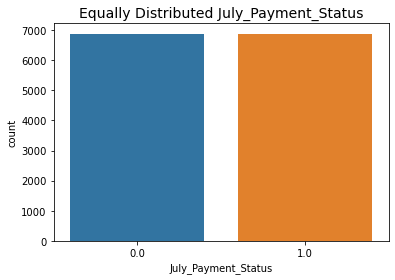

In [193]:
print('Distribution of the July_Payment_Status in the subsample dataset')
print(new_data['July_Payment_Status'].value_counts()/len(new_data))



sns.countplot('July_Payment_Status', data=new_data)
plt.title('Equally Distributed July_Payment_Status', fontsize=14)
plt.show()

In [194]:
new_data.index = range(new_data.shape[0])
#new_data

In [195]:
new_data.to_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/Cleaned Sub-sample-Nancy.csv")

### 5.3 Correlation Matrices 

In [196]:
new_data.head()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,14300.0,1.0,1.0,1.0,39.0,0.0,132.0,6707.0,-1.0,3010.0,...,-1.0,1.0,259.0,0.0,126.0,127.0,-1.0,138.0,125.0,0.0
1,8100.0,1.0,1.0,2.0,33.0,-2.0,53.0,19.0,-2.0,46.0,...,-2.0,48.0,37.0,-2.0,126.0,48.0,-2.0,94.0,126.0,0.0
2,4800.0,2.0,1.0,2.0,36.0,1.0,0.0,0.0,-2.0,9.0,...,-1.0,127.0,176.0,-1.0,228.0,127.0,-1.0,12.0,228.0,1.0
3,2000.0,1.0,2.0,1.0,47.0,0.0,145.0,1774.0,0.0,133.0,...,0.0,80.0,750.0,0.0,80.0,764.0,0.0,100.0,782.0,0.0
4,14000.0,1.0,1.0,1.0,72.0,0.0,160.0,4273.0,0.0,135.0,...,0.0,120.0,2594.0,0.0,52.0,2303.0,0.0,60.0,1822.0,0.0


```
Negative Correlation: Jan~Jun_Repay_Status
Positive Correlation: Other then Repay_Status
```

In [197]:
# Original Data
data1=data.copy()
Repay_Status_sum = data1[["Jan_Repay_Status","Feb_Repay_Status","Mar_Repay_Status","Apr_Repay_Status","May_Repay_Status","Jun_Repay_Status"]]
data1['Repay_Status_sum'] = Repay_Status_sum.apply(lambda x: x.sum(), axis=1)

Previous_Payment_Prior_sum=data1[["Previous_Payment_Prior_Jan","Previous_Payment_Prior_Feb","Previous_Payment_Prior_Mar","Previous_Payment_Prior_Apr","Previous_Payment_Prior_May","Previous_Payment_Prior_Jun"]]
data1["Previous_Payment_Prior_sum"]=Previous_Payment_Prior_sum.apply(lambda x: x.sum(), axis=1)

Statement_sum=data1[["Jan_Statement","Feb_Statement","Mar_Statement","Apr_Statement","May_Statement","Jun_Statement"]]
data1["Statement_sum"]=Statement_sum.apply(lambda x: x.sum(), axis=1)
data1.head()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status,Repay_Status_sum,Previous_Payment_Prior_sum,Statement_sum
0,9600.0,1.0,3.0,2.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0,44.0,10315.0,16878.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0,-12.0,181.0,177.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0,-6.0,3463.0,2919.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0,0.0,483.0,13835.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0,-12.0,1262.0,1549.0


In [198]:
data2= data1[["Credit_Limit","Sex","Education","Marital_Status","Age",
            "Repay_Status_sum","Previous_Payment_Prior_sum","Statement_sum","July_Payment_Status"]]
data2.head()

,Credit_Limit,Sex,Education,Marital_Status,Age,Repay_Status_sum,Previous_Payment_Prior_sum,Statement_sum,July_Payment_Status
0,9600.0,1.0,3.0,2.0,32.0,44.0,10315.0,16878.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-12.0,181.0,177.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-6.0,3463.0,2919.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,483.0,13835.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-12.0,1262.0,1549.0,0.0


In [199]:
# Sub-Data
new_data1=new_data.copy()
Repay_Status_sum = new_data1[["Jan_Repay_Status","Feb_Repay_Status","Mar_Repay_Status","Apr_Repay_Status","May_Repay_Status","Jun_Repay_Status"]]
new_data1['Repay_Status_sum'] = Repay_Status_sum.apply(lambda x: x.sum(), axis=1)

Previous_Payment_Prior_sum=new_data1[["Previous_Payment_Prior_Jan","Previous_Payment_Prior_Feb","Previous_Payment_Prior_Mar","Previous_Payment_Prior_Apr","Previous_Payment_Prior_May","Previous_Payment_Prior_Jun"]]
new_data1["Previous_Payment_Prior_sum"]=Previous_Payment_Prior_sum.apply(lambda x: x.sum(), axis=1)

Statement_sum=new_data1[["Jan_Statement","Feb_Statement","Mar_Statement","Apr_Statement","May_Statement","Jun_Statement"]]
new_data1["Statement_sum"]=Statement_sum.apply(lambda x: x.sum(), axis=1)
data.head()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,2.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0


In [200]:
new_data2= new_data1[["Credit_Limit","Sex","Education","Marital_Status","Age",
            "Repay_Status_sum","Previous_Payment_Prior_sum","Statement_sum","July_Payment_Status"]]
new_data2.head()

,Credit_Limit,Sex,Education,Marital_Status,Age,Repay_Status_sum,Previous_Payment_Prior_sum,Statement_sum,July_Payment_Status
0,14300.0,1.0,1.0,1.0,39.0,-4.0,3666.0,10360.0,0.0
1,8100.0,1.0,1.0,2.0,33.0,-12.0,404.0,329.0,0.0
2,4800.0,2.0,1.0,2.0,36.0,-5.0,552.0,540.0,1.0
3,2000.0,1.0,2.0,1.0,47.0,0.0,618.0,7218.0,0.0
4,14000.0,1.0,1.0,1.0,72.0,0.0,611.0,17838.0,0.0


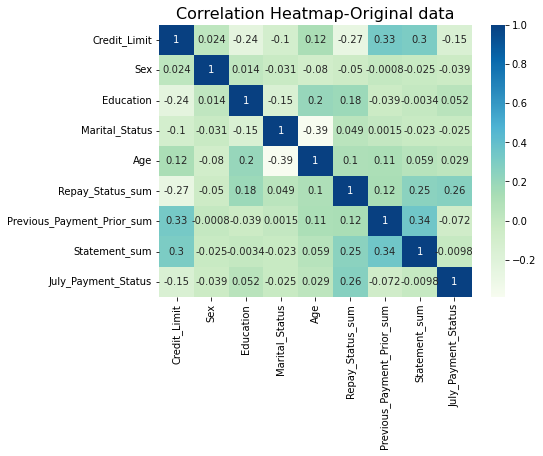

In [201]:
# Original data
plt.figure(figsize=(7,5))
sns.heatmap(data2.corr(), annot=True, cmap='GnBu')
plt.title("Correlation Heatmap-Original data", fontsize=((16)))
plt.show()

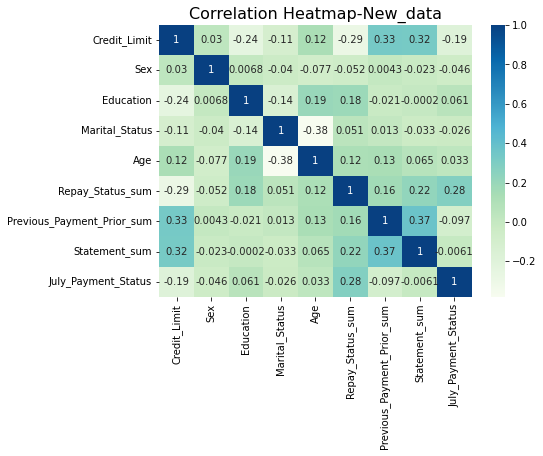

In [202]:
# new data
plt.figure(figsize=(7,5))
sns.heatmap(new_data2.corr(), annot=True, cmap='GnBu')
plt.title("Correlation Heatmap-New_data", fontsize=((16)))
plt.show()

### 5.4  Variables

In [203]:
data["Sex"].value_counts()

2.0    18473
1.0    12097
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

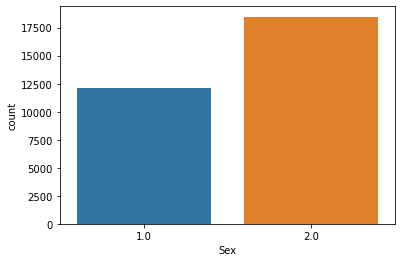

In [204]:
sns.countplot(data["Sex"])

<AxesSubplot:xlabel='Education', ylabel='count'>

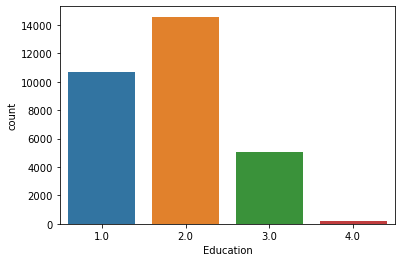

In [205]:
sns.countplot(data["Education"])

<AxesSubplot:xlabel='Age', ylabel='count'>

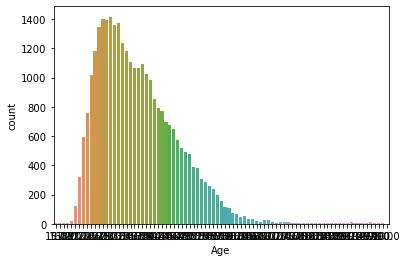

In [206]:
sns.countplot(data["Age"])

In [213]:
data

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,2.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30565,1700.0,2.0,2.0,1.0,29.0,0.0,80.0,1598.0,0.0,80.0,...,0.0,56.0,1598.0,0.0,52.0,1556.0,0.0,80.0,1509.0,0.0
30566,4700.0,1.0,1.0,2.0,33.0,2.0,80.0,2082.0,0.0,80.0,...,0.0,100.0,2194.0,0.0,100.0,2258.0,0.0,100.0,2321.0,1.0
30567,6000.0,2.0,1.0,2.0,53.0,0.0,191.0,5418.0,0.0,198.0,...,0.0,165.0,5740.0,0.0,201.0,5842.0,0.0,140.0,5994.0,1.0
30568,14500.0,2.0,3.0,2.0,46.0,-2.0,28.0,0.0,-2.0,0.0,...,-2.0,61.0,0.0,-2.0,0.0,61.0,-2.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

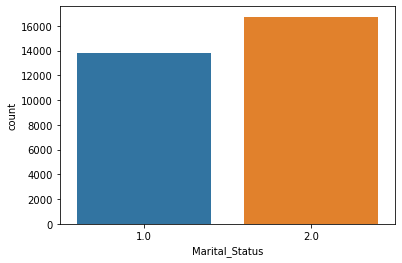

In [207]:
sns.countplot(data["Marital_Status"])

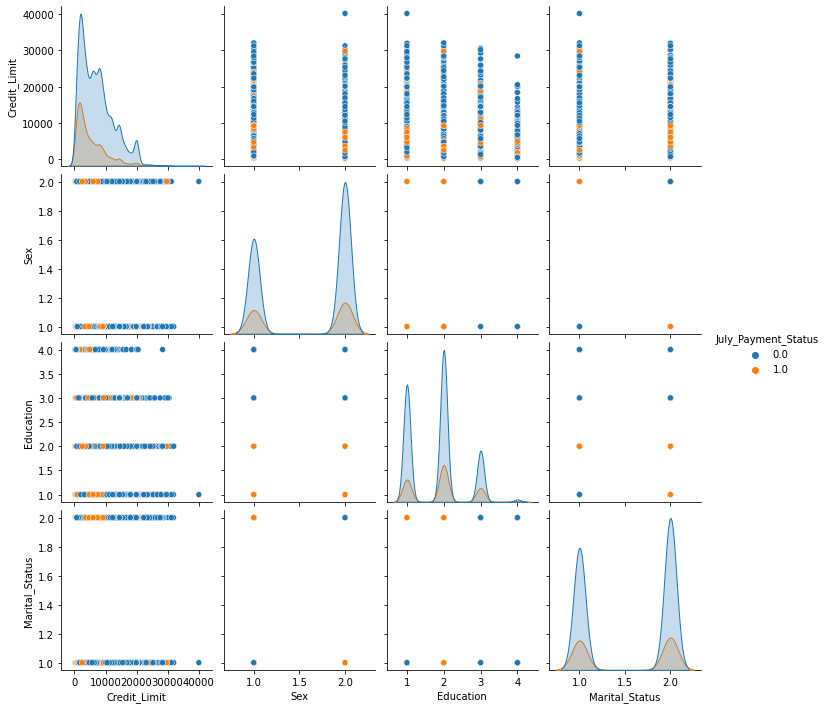

In [208]:
sns.pairplot(data=data2[['Credit_Limit','Sex',"Education",'Marital_Status','July_Payment_Status']], 
             hue = 'July_Payment_Status')

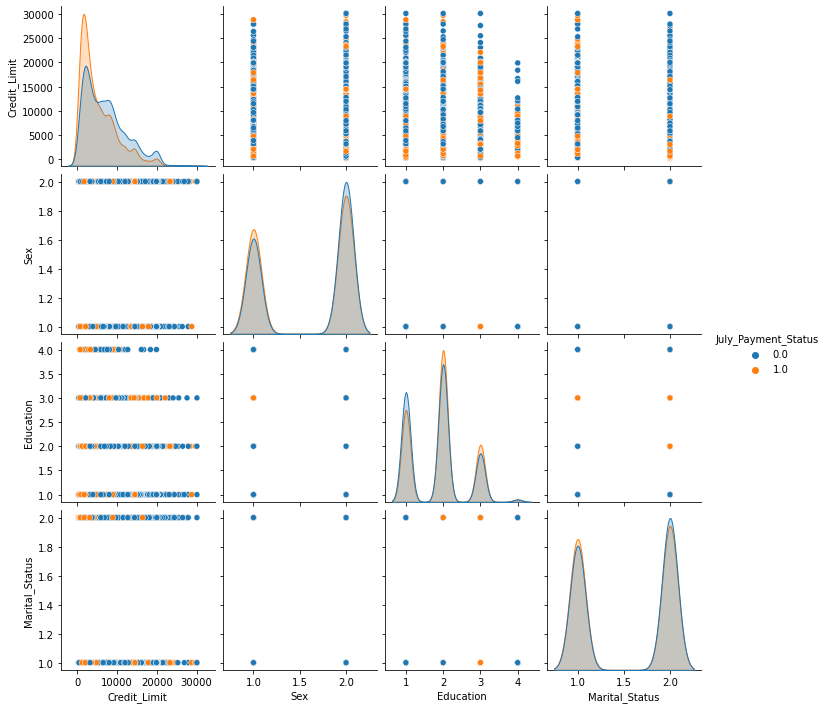

In [209]:
sns.pairplot(data=new_data2[['Credit_Limit','Sex',"Education",'Marital_Status','July_Payment_Status']], 
             hue = 'July_Payment_Status')

#### Infromation from the graph above
```
We can see many fraud happen in those people who have credit limit in $10,000;
Female easier to get fraud;
Most of them are single;
High education less be fraud;

```


